# Example: Hyperparameter tuning
--------------------------------

This example shows an advanced example on how to optimize your model's hyperparameters for multi-metric runs.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from optuna.distributions import IntDistribution
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
# Initialize atom
atom = ATOMClassifier(X, y, n_jobs=4, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 4 cores.
Parallelization backend: loky

Dataset stats ==================== >>
Shape: (569, 31)
Train set size: 456
Test set size: 113
-------------------------------------
Memory: 141.24 kB
Scaled: False
Outlier values: 167 (1.2%)



In [4]:
# Train a MultiLayerPerceptron model on two metrics
# using a custom number of hidden layers
atom.run(
    models="MLP",
    metric=["f1", "ap"],
    n_trials=10,
    est_params={"activation": "relu"},
    ht_params={
        "distributions": {
            "hidden_layer_1": IntDistribution(2, 4),
            "hidden_layer_2": IntDistribution(10, 20),
            "hidden_layer_3": IntDistribution(10, 20),
            "hidden_layer_4": IntDistribution(2, 4),
        }
    }
)


Training ========================= >>
Models: MLP
Metric: f1, average_precision


Running hyperparameter tuning for MultiLayerPerceptron...
| trial | hidden_layer_1 | hidden_layer_2 | hidden_layer_3 | hidden_layer_4 |      f1 | best_f1 | average_precision | best_average_precision | time_trial | time_ht |    state |
| ----- | -------------- | -------------- | -------------- | -------------- | ------- | ------- | ----------------- | ---------------------- | ---------- | ------- | -------- |
| 0     |              3 |             17 |             10 |              2 |  0.9455 |  0.9455 |            0.9837 |                 0.9837 |     0.627s |  0.627s | COMPLETE |
| 1     |              2 |             11 |             12 |              3 |  0.9739 |  0.9739 |            0.9988 |                 0.9988 |     0.704s |  1.331s | COMPLETE |
| 2     |              3 |             15 |             14 |              4 |  0.9913 |  0.9913 |               1.0 |                    1.0 |     0.63

In [5]:
# For multi-metric runs, the selected best trial is the first in the Pareto front
atom.mlp.best_trial

FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.9913043478260869, 1.0000000000000002], datetime_start=datetime.datetime(2023, 2, 24, 20, 10, 51, 71612), datetime_complete=datetime.datetime(2023, 2, 24, 20, 10, 51, 703672), params={'hidden_layer_1': 3, 'hidden_layer_2': 15, 'hidden_layer_3': 14, 'hidden_layer_4': 4}, user_attrs={'params': {'hidden_layer_1': 3,
 'hidden_layer_2': 15,
 'hidden_layer_3': 14,
 'hidden_layer_4': 4}, 'estimator': MLPClassifier(hidden_layer_sizes=(3, 15, 14, 4), random_state=1)}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'hidden_layer_1': IntDistribution(high=4, log=False, low=2, step=1), 'hidden_layer_2': IntDistribution(high=20, log=False, low=10, step=1), 'hidden_layer_3': IntDistribution(high=20, log=False, low=10, step=1), 'hidden_layer_4': IntDistribution(high=4, log=False, low=2, step=1)}, trial_id=2, value=None)

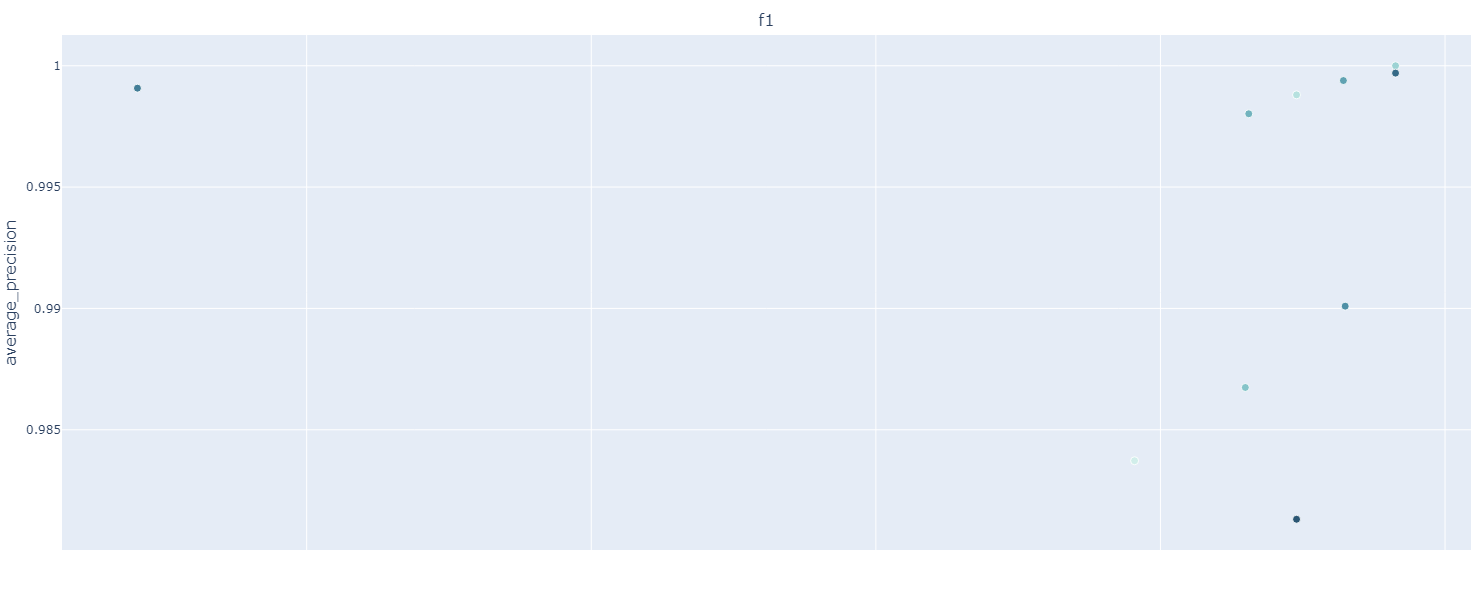

In [6]:
atom.plot_pareto_front()

In [7]:
# If you are unhappy with the results, it's possible to conitnue the study
atom.mlp.hyperparameter_tuning(n_trials=5)

Running hyperparameter tuning for MultiLayerPerceptron...
| trial | hidden_layer_1 | hidden_layer_2 | hidden_layer_3 | hidden_layer_4 |      f1 | best_f1 | average_precision | best_average_precision | time_trial | time_ht |    state |
| ----- | -------------- | -------------- | -------------- | -------------- | ------- | ------- | ----------------- | ---------------------- | ---------- | ------- | -------- |
| 10    |              4 |             18 |             13 |              4 |     1.0 |     1.0 |               1.0 |                    1.0 |     0.724s |  8.475s | COMPLETE |
| 11    |              2 |             14 |             19 |              2 |  0.9492 |     1.0 |            0.9899 |                    1.0 |     0.709s |  9.183s | COMPLETE |
| 12    |              2 |             11 |             10 |              4 |  0.7703 |     1.0 |              0.99 |                    1.0 |     0.835s | 10.018s | COMPLETE |
| 13    |              2 |             12 |             1

In [8]:
# The trials attribute gives an overview of the trial results
atom.mlp.trials

params  \
trial                                           
0      {'hidden_layer_sizes': (3, 17, 10, 2)}   
1      {'hidden_layer_sizes': (2, 11, 12, 3)}   
2      {'hidden_layer_sizes': (3, 15, 14, 4)}   
3      {'hidden_layer_sizes': (2, 19, 10, 4)}   
4      {'hidden_layer_sizes': (3, 16, 11, 2)}   
5      {'hidden_layer_sizes': (4, 20, 13, 4)}   
6      {'hidden_layer_sizes': (4, 19, 10, 2)}   
7      {'hidden_layer_sizes': (2, 19, 11, 3)}   
8      {'hidden_layer_sizes': (4, 15, 17, 2)}   
9      {'hidden_layer_sizes': (4, 19, 10, 4)}   
10     {'hidden_layer_sizes': (4, 18, 13, 4)}   
11     {'hidden_layer_sizes': (2, 14, 19, 2)}   
12     {'hidden_layer_sizes': (2, 11, 10, 4)}   
13     {'hidden_layer_sizes': (2, 12, 15, 2)}   
14     {'hidden_layer_sizes': (3, 11, 16, 4)}   

                                               estimator  \
trial                                                      
0      MLPClassifier(hidden_layer_sizes=(3, 17, 10, 2...   
1      MLPClassifier(hidden_layer_sizes=(2, 11, 12, 3...   
2      MLPClassifier(hidden_layer_sizes=(3, 15, 14, 4...   
3      MLPClassifier(hidden_layer_sizes=(2, 19, 10, 4...   
4      MLPClassifier(hidden_layer_sizes=(3, 16, 11, 2...   
5      MLPClassifier(hidden_layer_sizes=(4, 20, 13, 4...   
6      MLPClassifier(hidden_layer_sizes=(4, 19, 10, 2...   
7      MLPClassifier(hidden_layer_sizes=(2, 19, 11, 3...   
8      MLPClassifier(hidden_layer_sizes=(4, 15, 17, 2...   
9      MLPClassifier(hidden_layer_sizes=(4, 19, 10, 4...   
10     MLPClassifier(hidden_layer_sizes=(4, 18, 13, 4...   
11     MLPClassifier(hidden_layer_sizes=(2, 14, 19, 2...   
12     MLPClassifier(hidden_layer_sizes=(2, 11, 10, 4...   
13     MLPClassifier(hidden_layer_sizes=(2, 12, 15, 2...   
14     MLPClassifier(hidden_layer_sizes=(3, 11, 16, 4...   

                                          score time_trial    time_ht  \
trial                                                                   
0      [0.9454545454545454, 0.9837236558914353]   0.627226   0.627226   
1      [0.9739130434782608, 0.9988003322156944]   0.704077   1.331303   
2      [0.9913043478260869, 1.0000000000000002]   0.633055   1.964358   
3      [0.9649122807017544, 0.9867431480369178]    0.62296   2.587318   
4      [0.9655172413793103, 0.9980213692125051]   0.617179   3.204497   
5       [0.9821428571428572, 0.999389732649834]   0.621078   3.825575   
6       [0.9824561403508771, 0.990093407959159]   0.863342   4.688917   
7      [0.7702702702702703, 0.9990764494418141]   0.881802   5.570719   
8      [0.9913043478260869, 0.9996975196612221]   1.109416   6.680135   
9      [0.9739130434782608, 0.9813127743443262]   1.070974   7.751109   
10                    [1.0, 1.0000000000000002]   0.723657   8.474766   
11     [0.9491525423728813, 0.9899476963066745]   0.708648   9.183414   
12     [0.7702702702702703, 0.9900232191286547]    0.83476  10.018174   
13     [0.9642857142857142, 0.9812621686248989]   0.778707  10.796881   
14     [0.7702702702702703, 0.9723670235061694]   0.740589   11.53747   

          state  
trial            
0      COMPLETE  
1      COMPLETE  
2      COMPLETE  
3      COMPLETE  
4      COMPLETE  
5      COMPLETE  
6      COMPLETE  
7      COMPLETE  
8      COMPLETE  
9      COMPLETE  
10     COMPLETE  
11     COMPLETE  
12     COMPLETE  
13     COMPLETE  
14     COMPLETE

In [9]:
# Select a custom best trial...
atom.mlp.best_trial = 2

# ...and check that the best parameters are now those in the selected trial
atom.mlp.best_params

{'hidden_layer_sizes': (3, 15, 14, 4)}

In [10]:
# Lastly, fit the model on the complete training set 
# using the new combination of hyperparameters
atom.mlp.fit()

Fit ---------------------------------------------
Train evaluation --> f1: 0.9948   average_precision: 0.9994
Test evaluation --> f1: 0.9861   average_precision: 0.997
Time elapsed: 3.028s


## Analyze the results

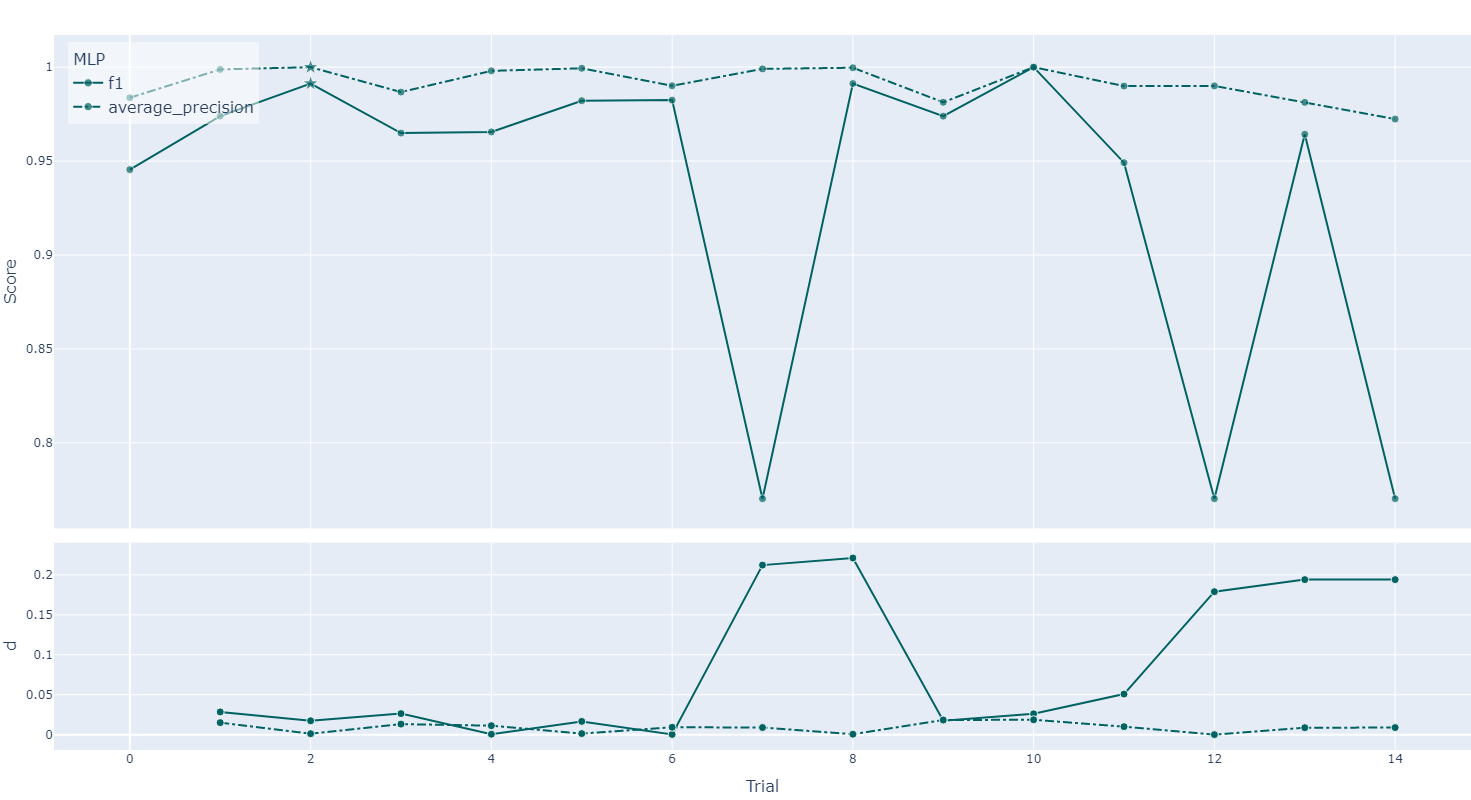

In [11]:
atom.plot_trials()

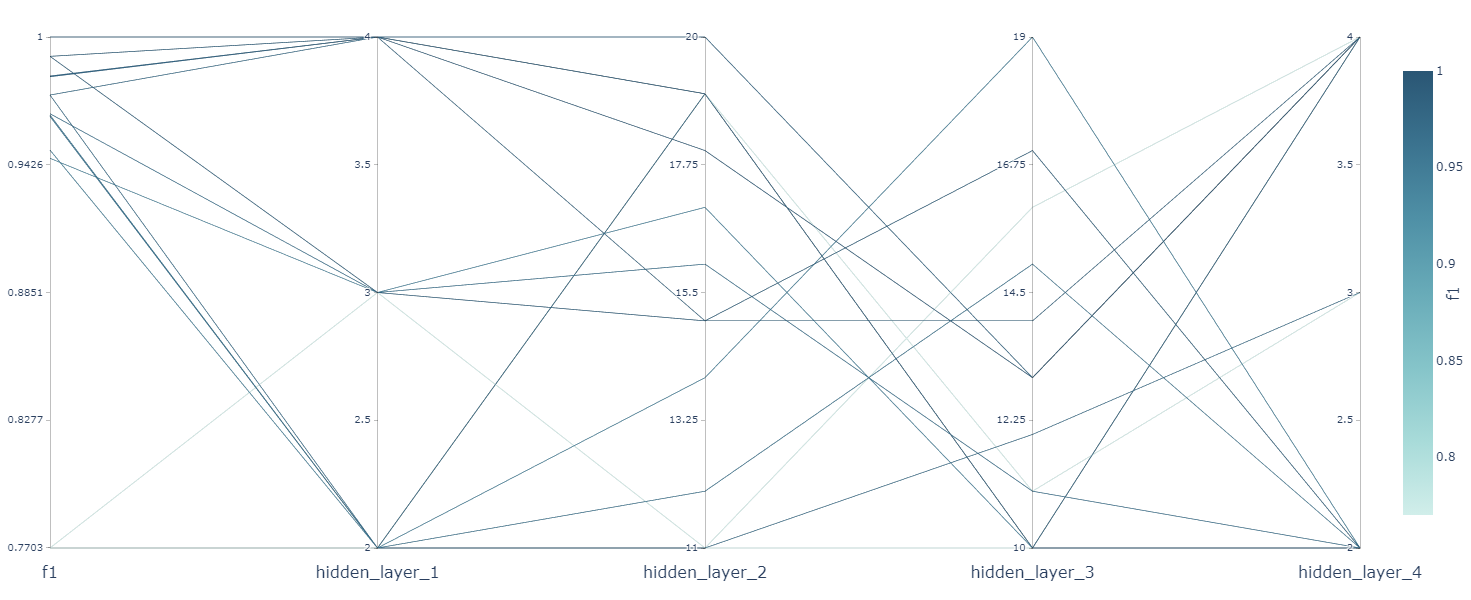

In [12]:
atom.plot_parallel_coordinate()